Reading the text

In [ ]:
import pandas as pd


file_path = '/content/data.csv'


df = pd.read_csv(file_path)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.head())

             SENSEX  US ROI  INDIAN ROI   time_idx  month  EXR RATE IN $
Date                                                                    
2005-04-04  6616.83    2.78         4.77         0      4          43.76
2005-04-05  6611.53    2.72         4.76         0      4          43.81
2005-04-06  6555.92    2.73         4.76         0      4          43.76
2005-04-07  6629.12    2.76         4.77         0      4          43.74
2005-04-08  6544.81    2.75         4.77         0      4          43.77


In [ ]:
import matplotlib.pyplot as plt


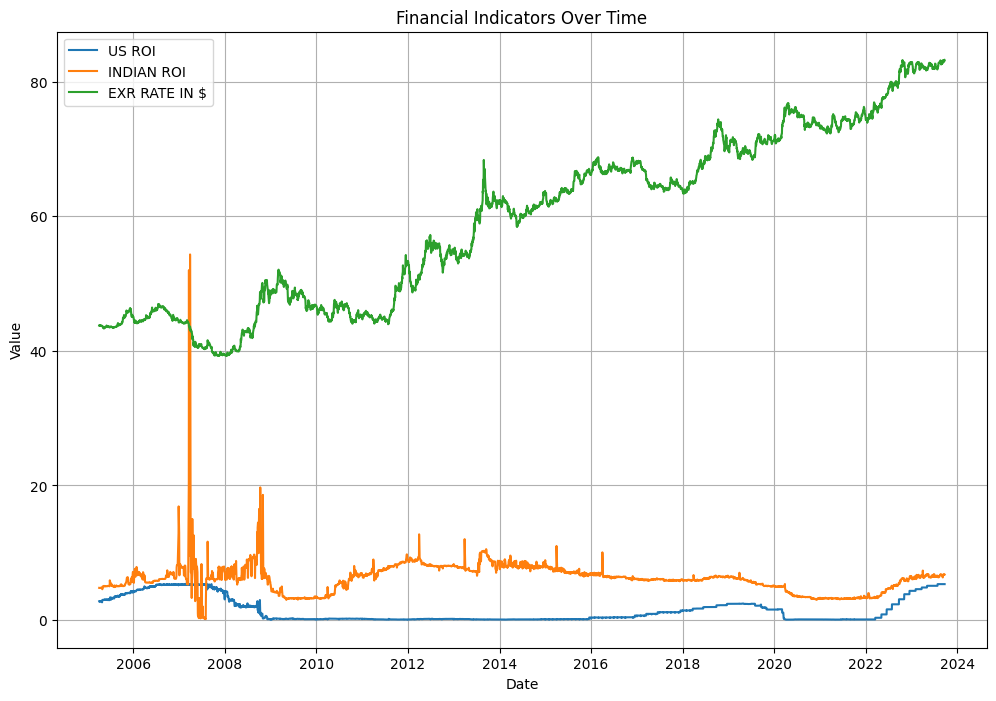

In [ ]:

# Step 2: Initial Exploration
# Plot each financial indicator over time
plt.figure(figsize=(12, 8))

# Plot SENSEX
# plt.plot(df.index, df['SENSEX'], label='SENSEX')

# Plot US ROI
plt.plot(df.index, df['US ROI'], label='US ROI')

# Plot INDIAN ROI
plt.plot(df.index, df['INDIAN ROI '], label='INDIAN ROI ')

# Plot EXR RATE IN $
plt.plot(df.index, df['EXR RATE IN $'], label='EXR RATE IN $')

plt.title('Financial Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


We can spot sudden spike in the visualization between the years 2006 - 2008

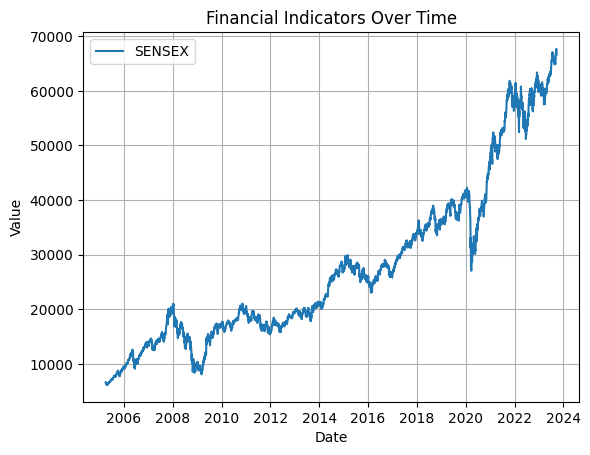

In [ ]:
plt.plot(df.index, df['SENSEX'], label='SENSEX')

plt.title('Financial Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Meanwhile sensex have been increasing very high over the years

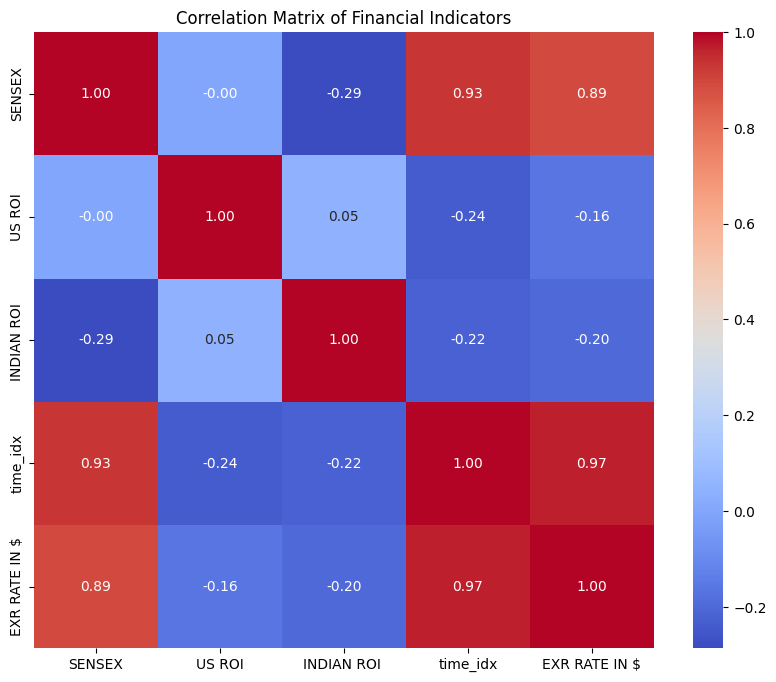

In [ ]:
import seaborn as sns

# Step 3: Correlation Analysis
# Exclude 'month' column from correlation matrix
correlation_matrix = df.drop(columns=['month']).corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Financial Indicators')
plt.show()


We can see clear trend between Exchange rate and sensex

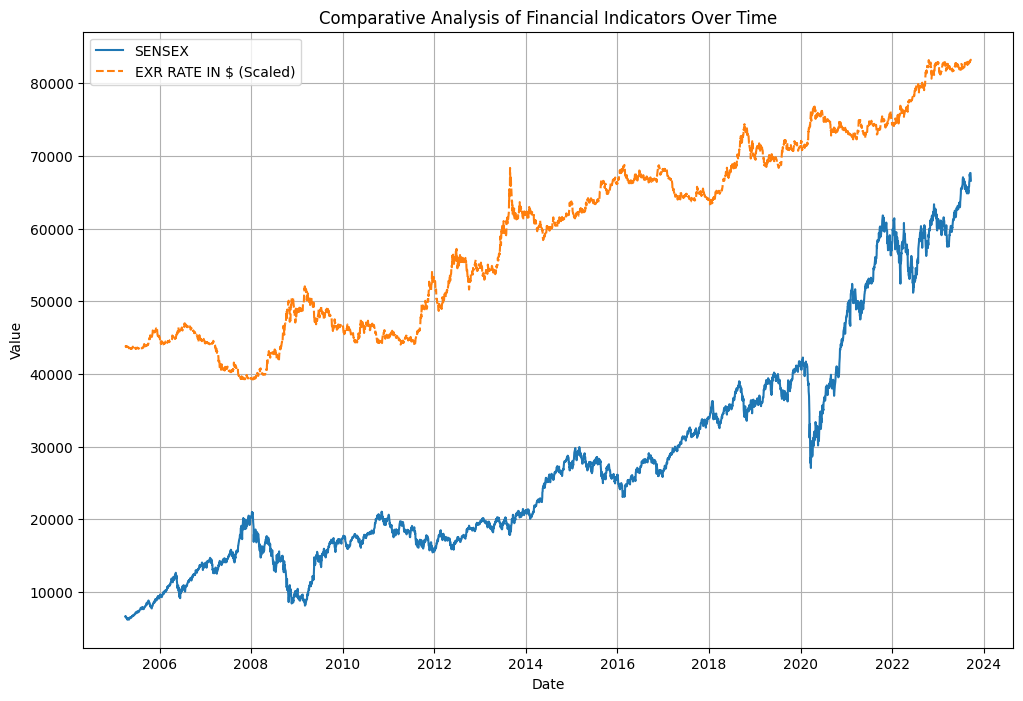

In [ ]:
import matplotlib.pyplot as plt

# Step 4: Comparative Analysis
plt.figure(figsize=(12, 8))

# Plot SENSEX
plt.plot(df.index, df['SENSEX'], label='SENSEX')

# Plot EXR RATE IN $ (scaled to match the range of other indicators)
scaled_exchange_rate = df['EXR RATE IN $'] *1000   # Scale for visualization purpose
plt.plot(df.index, scaled_exchange_rate, label='EXR RATE IN $ (Scaled)', linestyle='--')

plt.title('Comparative Analysis of Financial Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


We can see the exchange rate and sensex clearly follow a overrall trend of increasing through out the years

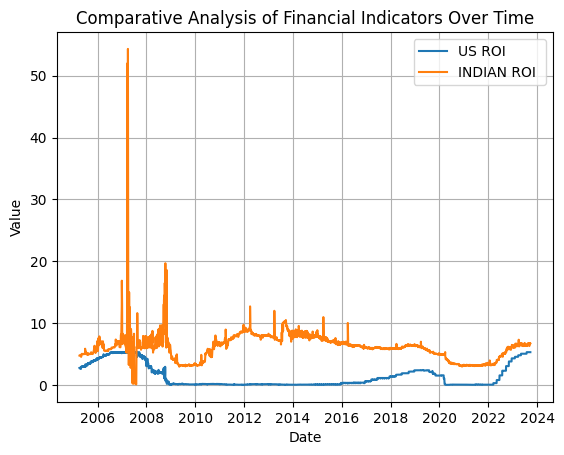

In [ ]:
# Plot US ROI
plt.plot(df.index, df['US ROI'], label='US ROI')

# Plot INDIAN ROI
plt.plot(df.index, df['INDIAN ROI '], label='INDIAN ROI ')
plt.title('Comparative Analysis of Financial Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

We can see that from year 2020 the USA and Indian rate of interest are following the same trend.

In [ ]:
df2=pd.read_csv('/content/data.csv',index_col='Date',parse_dates=True)

In [ ]:
df2.head()

,SENSEX,US ROI,INDIAN ROI,time_idx,month,EXR RATE IN $
Date,,,,,,
2005-04-04,6616.83,2.78,4.77,0,4,43.76
2005-04-05,6611.53,2.72,4.76,0,4,43.81
2005-04-06,6555.92,2.73,4.76,0,4,43.76
2005-04-07,6629.12,2.76,4.77,0,4,43.74
2005-04-08,6544.81,2.75,4.77,0,4,43.77


In [ ]:
!pip install dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 22.7 MB/s eta 0:00:00


In [ ]:
!pip install dash pandas plotly


In [68]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go

df = pd.read_csv('/content/data.csv')

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1('Financial Data Dashboard', style={'textAlign': 'center', 'marginBottom': '20px'}),


    html.Div([
        dcc.Dropdown(
            id='plot-option-dropdown',
            options=[
                {'label': 'Single Factor', 'value': 'single'},
                {'label': 'Two Factors', 'value': 'two'},
            ],
            value='single',
            style={'width': '50%', 'margin': 'auto', 'marginBottom': '20px'}
        )
    ], style={'textAlign': 'center'}),


    html.Div(id='single-factor-container', children=[
        dcc.Dropdown(
            id='single-factor-dropdown',
            options=[
                {'label': 'SENSEX', 'value': 'SENSEX'},
                {'label': 'US ROI', 'value': 'US ROI'},
                {'label': 'INDIAN ROI ', 'value': 'INDIAN ROI '},
                {'label': 'EXR RATE IN $', 'value': 'EXR RATE IN $'},
            ],
            value='SENSEX',  # Default value
            style={'width': '50%', 'margin': 'auto', 'marginBottom': '20px'}
        ),
        dcc.Graph(id='single-factor-graph')
    ], style={'display': 'none'}),


    html.Div(id='two-factor-container', children=[
        dcc.Dropdown(
            id='first-factor-dropdown',
            options=[
                {'label': 'SENSEX', 'value': 'SENSEX'},
                {'label': 'US ROI', 'value': 'US ROI'},
                {'label': 'INDIAN ROI ', 'value': 'INDIAN ROI '},
                {'label': 'EXR RATE IN $', 'value': 'EXR RATE IN $'},
            ],
            value='SENSEX',  # Default value
            style={'width': '45%', 'margin': 'auto', 'marginBottom': '20px', 'display': 'inline-block'}
        ),
        dcc.Dropdown(
            id='second-factor-dropdown',
            options=[
                {'label': 'SENSEX', 'value': 'SENSEX'},
                {'label': 'US ROI', 'value': 'US ROI'},
                {'label': 'INDIAN ROI ', 'value': 'INDIAN ROI '},
                {'label': 'EXR RATE IN $', 'value': 'EXR RATE IN $'},
            ],
            value='US ROI',  # Default value
            style={'width': '45%', 'margin': 'auto', 'marginBottom': '20px', 'display': 'inline-block'}
        ),
        dcc.Graph(id='two-factor-graph')
    ], style={'display': 'none'}),

    # Loading indicator
    html.Div(id='loading-indicator', children=[
        html.Div(className='lds-dual-ring', children=[]),
        html.Div('Loading Data...', style={'textAlign': 'center'})
    ], style={'textAlign': 'center', 'display': 'none'}),
])

@app.callback(
    Output('single-factor-container', 'style'),
    Output('two-factor-container', 'style'),
    [Input('plot-option-dropdown', 'value')]
)
def update_plotting_option(selected_option):
    if selected_option == 'single':
        return {'display': 'block'}, {'display': 'none'}
    else:
        return {'display': 'none'}, {'display': 'block'}


@app.callback(
    Output('single-factor-graph', 'figure'),
    [Input('single-factor-dropdown', 'value')]
)
def update_single_factor_plot(factor):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df[factor], mode='lines', name=factor))
    fig.update_layout(title=f'{factor} over Time', xaxis_title='Date', yaxis_title=f'{factor}')
    return fig


@app.callback(
    Output('two-factor-graph', 'figure'),
    [Input('first-factor-dropdown', 'value'),
     Input('second-factor-dropdown', 'value')]
)
def update_two_factor_plot(first_factor, second_factor):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df[first_factor], mode='lines', name=first_factor))
    fig.add_trace(go.Scatter(x=df['Date'], y=df[second_factor], mode='lines', name=second_factor))
    fig.update_layout(title=f'{first_factor} vs. {second_factor} over Time', xaxis_title='Date', yaxis_title='Value')
    return fig


if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>